# Mediods Analysis

This experiment has the purpose of analysing the medoid of some of the clusters defined in the previous experiment. According to it, the best number of cluster is ?? regarding the square of the 2-norm distance, ?? regarding the silhoutte score and ?? regarding the davies-bouldin score. Therefore, the number of clusters that we will use in the present experiment is ??.


In [1]:
import sys
sys.path.append('../')
from src import reader as r
from src import visualization as v

In [2]:
%matplotlib notebook
import numpy as np
import sklearn
print(sklearn.__version__)
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances

0.20.0


In [3]:
X = r.readBOW()
npX = X.values
print(npX)
print(X.head(10))
print(X.shape)

['word2vec.csv', 'health.txt', 'bags.csv']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.55220061 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9   ...    0.1185  0.1186  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   ...       0.0     0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [4]:
news = r.readNews()
print(news.head(10))

['word2vec.csv', 'health.txt', 'bags.csv']
                   id                    publish_date  \
0  576880531301801984  Sat Mar 14 23:00:11 +0000 2015   
1  576820122666471424  Sat Mar 14 19:00:08 +0000 2015   
2  576744652717461504  Sat Mar 14 14:00:15 +0000 2015   
3  576736754436304896  Sat Mar 14 13:28:52 +0000 2015   
4  576736614766010368  Sat Mar 14 13:28:18 +0000 2015   
5  576548368740052992  Sat Mar 14 01:00:17 +0000 2015   
6  576518190286536704  Fri Mar 13 23:00:22 +0000 2015   
7  576494177971732480  Fri Mar 13 21:24:57 +0000 2015   
8  576472874946433024  Fri Mar 13 20:00:18 +0000 2015   
9  576464606551490560  Fri Mar 13 19:27:27 +0000 2015   

                                       headline_test  
0  An abundance of online info can turn us into e...  
1  A plant-based diet that incorporates fish may ...  
2  It doesn't take much to damage your hearing at...  
3  RT @CNN: Forever young? Discover this island’s...  
4  RT @CNN: Is post-traumatic stress disorder in ...  

In [5]:
from MulticoreTSNE import MulticoreTSNE as TSNE

smp_sz = X.size
tsne_bow = TSNE(n_components=2, perplexity=10, verbose=True, n_jobs=-1)#500
tsne_bow_result = tsne_bow.fit_transform(X)

## Computing the Medoids
In here, we compute the medoids as the closest point to the centroids of the clusters.

In [6]:
best_K = 62
print("#############################")
print("Best K =", best_K)
print("Applying K-means")
best_cluster = KMeans(n_clusters=best_K, n_jobs=-1)
best_cluster_result = best_cluster.fit(X)
print("Finished")
print("#############################")    

#############################
Best K = 62
Applying K-means
Finished
#############################


In [7]:
y_pred = best_cluster.labels_
arrays=[]
for i in range(best_K):
    dist = np.linalg.norm(best_cluster.cluster_centers_[i]-npX[y_pred==i],axis=1)
    index = np.argmin(dist)
    arrays.append(npX[y_pred==i][index])   

medoids = np.vstack(arrays)
print(medoids.shape)
print(medoids)

(62, 1203)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
l = []
for i in range(best_K):
    l.append(np.where(np.all(npX==medoids[i],axis=1))[0][0]) # these last [0][0] return the index, since the output of this command is (array([id]),)
    
index = np.array(l)
print(index)
print(len(np.unique(index)))

[ 2605  3231  7390  4286  4613  2610  2706 11177  1531  2970  9419  5066
  2943  7764  5874  2784 10514  2155 12880  5434  2659  3690  3356  2937
  4474  2797  2189   148 10737  6851    98  6088  9818  2533  1937  2836
   804  2298  7727  2277   615  1224 10022  6290 12249  9450  4565  1785
  6223  5852  1482  2292  9639 10223  2205  9355  3585  5032 12931 11429
  2921  7575]
62


## Selecting medoids neighbors
Here the medoids neighbors are selected in order to plot them and see if the clusters make sense.

In [9]:
nm = 5 #number of medoids to be analyzed
nnp = 5 #number of neighbor points of the medoids
np.random.seed(42)
r = np.random.randint(0,61,nm)
selected_medoids = medoids[r]
print("Random indexes:",r)
points_per_medoid = []

for i in range(nm):
    p = selected_medoids[i]
    aux = npX[y_pred==r[i]]
    d = np.linalg.norm(aux-p,axis=1)
    points = []
    points.append(index[r[i]])
    
    for j in range(nnp):
        min_d = d.argmin()
        while (d[min_d] == 0.):
            d[min_d] = np.inf
            min_d = d.argmin()
        points = points + (np.where(np.all(npX==aux[min_d],axis=1))[0]).tolist()
        d[min_d] = np.inf
        
    points_per_medoid.append(np.unique(points).tolist())

    
print("Points:",points_per_medoid)
print(len(points_per_medoid))

Random indexes: [38 51 28 14 42]
Points: [[2889, 3106, 6071, 6449, 6978, 7727, 7731, 8186, 8283, 8467, 8942], [2292, 2901, 3982, 5725, 9658, 12544], [2731, 5114, 7949, 9340, 10737, 13215], [1299, 4822, 5139, 5874, 12431, 12714], [1936, 4174, 9625, 9725, 9979, 10022, 13087]]
5


### News of the medoids and their neighbors

In [10]:
for p in points_per_medoid:
    info = np.take(news,p,0).loc[:,"headline_test"].values
    print("----------------------------")
    for i in range(info.size):
        print(info[i],"\n")
print("----------------------------")

----------------------------
No joke, laughter is good for you 

New SARS-like virus a medical mystery 

Why cutting out these unhealthy foods may actually make you a nicer person: 

Get fat, don't get fat! The best healthy fat foods: 

Feeling achy? Hit the gym! More surprising times to work out: 

Trying to lose weight? Add one of these fat-burning foods to your cabinet: 

The best meat-free protein sources: 

Like Father, Like Child: Meet Hollywood's most adorable look-alikes 

How to put a lid on binge eating: 

Why cutting out these unhealthy foods may actually make you a nicer person: 

Guys, this one's for you! @Eatsmarttbd joins us for a chat on Thurs @ 1pm ET to discuss #MensHealth. 

----------------------------
Catching up with the Fit Nation team 

New Jersey bans minors from tanning beds 

Yosemite campers worried about #hantavirus 

Anti-diabetic drug offers promise for preventing drug-resistant TB 

One in five care homes 'fail key test' 

Surgeon's mark raises ethics is

### News of the medoids and their neighbors (Plot)

<IPython.core.display.Javascript object>


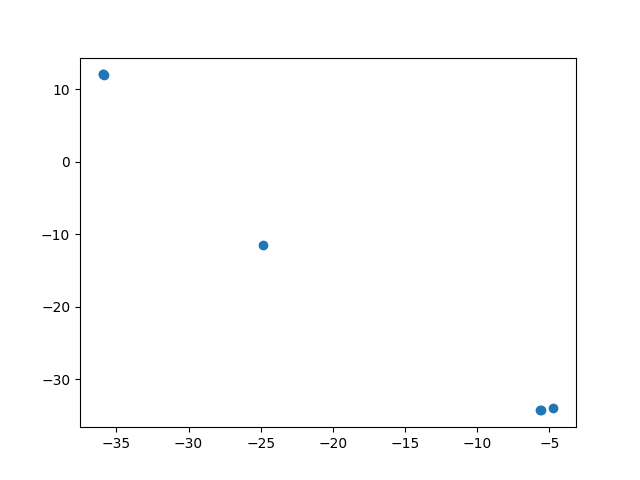

In [11]:
true_label = np.zeros((npX.shape[0],1))
np.put(true_label,index,1)
info = np.take(news,points_per_medoid[4],0).loc[:,"headline_test"]

plot = v.visualize_sup_scatter_hover(tsne_bow_result[points], true_label[points], info.values)
plot.show()

## Medoids Headlines
After the medoids are computed, the headlines of the news represented by those medoids are shown bellow.

In [12]:
np.take(news,index,0)

,id,publish_date,headline_test
2605,335669347802554369,Sat May 18 08:13:03 +0000 2013,Learning to eat again: Man drops 130 pounds af...
3231,298036671037964288,Sun Feb 03 11:54:14 +0000 2013,Grand slam diet: How to supercharge your body
7390,298854263013117953,Tue Feb 05 18:03:03 +0000 2013,RT @EinsteinMed: Learn more about Dr. Crandall...
4286,580807695156002817,Wed Mar 25 19:05:20 +0000 2015,Australian siblings working to raise awareness...
4613,573572786553229312,Thu Mar 05 19:56:23 +0000 2015,"#NYC air can increase risk of stroke, study finds"
2610,335377266878083072,Fri May 17 12:52:26 +0000 2013,Your breast cancer questions answered
2706,330894669640761344,Sun May 05 04:00:11 +0000 2013,3 lessons from a triathlete-to-be
11177,489320243127271424,Wed Jul 16 08:06:51 +0000 2014,Child obesity 'needs to be tackled'
1531,419207992366870528,Fri Jan 03 20:45:48 +0000 2014,There are definite harms associated w/ lung ca...
2970,314763312590106626,Thu Mar 21 15:39:56 +0000 2013,"When given a choice, workers choose cheaper #h..."
